In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [ ]:
df = pd.read_csv("Data/master_1989_2000.csv")
df = df.drop(columns=["decade1", "decade2"]) # dummy vars for 60s and 70s will always be 0

FileNotFoundError: ignored

In [ ]:
df

,country.name.en,year,cowcode,per_capita_deaths,warstds,ager,agexp,anoc,army85,autch98,...,seceduc,second,semipol3,sip2,sxpnew,sxpsq,tnatwar,trade,warhist,xconst
0,Afghanistan,1989,700,0.000436,0,119.0,13.870682,0,47000.0,0,...,8.000000,0.253000,0,0.055556,0.102386,0.022091,0,47.524694,0,2
1,Afghanistan,1990,700,0.000119,0,120.0,13.866166,0,47000.0,1,...,8.000000,0.253000,0,0.055556,0.102345,0.022067,0,47.624741,0,2
2,Afghanistan,1991,700,0.000248,0,121.0,13.906834,0,47000.0,0,...,9.000000,0.253000,0,0.055556,0.102541,0.022186,0,47.572924,0,2
3,Afghanistan,1992,700,0.000295,0,122.0,13.881321,0,47000.0,0,...,9.000000,0.253000,0,0.055556,0.102914,0.022477,0,47.612371,0,2
4,Afghanistan,1993,700,0.000235,0,123.0,13.842415,1,47000.0,0,...,9.000000,0.253000,0,0.390557,0.102284,0.022099,1,47.638622,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Zimbabwe,1996,552,0.000000,0,31.0,6.760000,0,46000.0,0,...,47.299999,0.200000,0,0.357490,0.175017,0.030631,0,78.975510,0,3
1944,Zimbabwe,1997,552,0.000000,0,32.0,7.620000,0,46000.0,0,...,47.299999,0.200000,0,0.357490,0.194624,0.037878,0,72.737373,0,3
1945,Zimbabwe,1998,552,0.000000,0,33.0,10.590000,0,46000.0,0,...,47.299999,0.200000,0,0.357490,0.158606,0.052775,0,79.235222,0,3
1946,Zimbabwe,1999,552,0.000000,0,34.0,8.514664,0,46000.0,-1,...,47.299999,0.200000,0,0.357490,0.157868,0.052714,0,72.858179,0,3


In [ ]:
df.cowcode = df.cowcode.astype('str') # recode this as a categorical variable

In [ ]:
by_group_vars = df.groupby('cowcode').std()
dynamic_vars = ""
for c in by_group_vars.columns.tolist():
    if by_group_vars[c].sum() == 0: # these variables are constant per country
        print(c)
    else:
        dynamic_vars += f"\"{c}\", "

warhist


In [ ]:
print(dynamic_vars)

"year", "per_capita_deaths", "warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4", "autonomy", "avgnabo", "centpol3", "coldwar", "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98", "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade", "xconst", 


In [ ]:
# get unique IDs
country_ids = df["cowcode"].unique().tolist()
print(country_ids)

['700', '339', '615', '540', '160', '371', '900', '305', '373', '31', '692', '771', '53', '370', '211', '80', '434', '760', '145', '346', '571', '140', '355', '439', '516', '811', '471', '20', '402', '482', '483', '155', '710', '100', '581', '484', '490', '94', '437', '344', '40', '352', '316', '315', '390', '522', '42', '130', '651', '92', '531', '366', '572', '530', '950', '375', '220', '481', '420', '372', '260', '255', '452', '350', '55', '90', '438', '404', '110', '41', '91', '310', '395', '750', '850', '630', '645', '205', '666', '325', '51', '740', '663', '705', '501', '690', '703', '812', '367', '660', '570', '450', '620', '368', '212', '553', '820', '432', '338', '435', '590', '70', '359', '712', '600', '541', '775', '565', '790', '210', '920', '93', '436', '475', '343', '385', '698', '770', '95', '910', '150', '135', '840', '290', '235', '694', '360', '365', '517', '990', '670', '433', '345', '591', '451', '830', '317', '349', '940', '520', '560', '732', '230', '780', '625', 

In [ ]:
# we need to make a lagged dataset
df2 = df.copy()
df2["last_year_pc_deaths"] = df2.groupby(["cowcode"])["per_capita_deaths"].shift()
df2["year_deaths_diff"] = df2.groupby("cowcode")["last_year_pc_deaths"].diff()
df2 = df2.dropna()
df2[["country.name.en", "year", "per_capita_deaths", "last_year_pc_deaths", "year_deaths_diff"]]

,country.name.en,year,per_capita_deaths,last_year_pc_deaths,year_deaths_diff
2,Afghanistan,1991,0.000248,0.000119,-0.000317
3,Afghanistan,1992,0.000295,0.000248,0.000129
4,Afghanistan,1993,0.000235,0.000295,0.000047
5,Afghanistan,1994,0.000523,0.000235,-0.000060
6,Afghanistan,1995,0.000305,0.000523,0.000288
...,...,...,...,...,...
1943,Zimbabwe,1996,0.000000,0.000000,0.000000
1944,Zimbabwe,1997,0.000000,0.000000,0.000000
1945,Zimbabwe,1998,0.000000,0.000000,0.000000
1946,Zimbabwe,1999,0.000000,0.000000,0.000000


In [ ]:
# It works as an approximation to the percentage error between our forecasting model and the target, which is a nice way to understand the errors our model is making.
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [ ]:
mean_error = []
for year in range(1992,2001):
    train = df2[df2['year'] < year]
    val = df2[df2['year'] == year]
    
    p = val['last_year_pc_deaths'].values

    error = rmsle(val['per_capita_deaths'].values, p)
    print('Year %d - Error %.5f' % (year, error))
    mean_error.append(error)
print('Mean Error = %.10f' % np.mean(mean_error))

# low error - most countries never experience deaths from civil war

Year 1992 - Error 0.00009
Year 1993 - Error 0.00007
Year 1994 - Error 0.00008
Year 1995 - Error 0.00005
Year 1996 - Error 0.00005
Year 1997 - Error 0.00027
Year 1998 - Error 0.00019
Year 1999 - Error 0.00008
Year 2000 - Error 0.00003
Mean Error = 0.0001009805


This means the mean error to beat is 0.00011.

In [ ]:
df2

,country.name.en,year,cowcode,per_capita_deaths,warstds,ager,agexp,anoc,army85,autch98,...,semipol3,sip2,sxpnew,sxpsq,tnatwar,trade,warhist,xconst,last_year_pc_deaths,year_deaths_diff
2,Afghanistan,1991,700,0.000248,0,121.0,13.906834,0,47000.0,0,...,0,0.055556,0.102541,0.022186,0,47.572924,0,2,0.000119,-0.000317
3,Afghanistan,1992,700,0.000295,0,122.0,13.881321,0,47000.0,0,...,0,0.055556,0.102914,0.022477,0,47.612371,0,2,0.000248,0.000129
4,Afghanistan,1993,700,0.000235,0,123.0,13.842415,1,47000.0,0,...,0,0.390557,0.102284,0.022099,1,47.638622,0,4,0.000295,0.000047
5,Afghanistan,1994,700,0.000523,0,124.0,13.879234,1,47000.0,0,...,0,0.389900,0.102376,0.022059,1,47.670182,0,4,0.000235,-0.000060
6,Afghanistan,1995,700,0.000305,0,125.0,13.875722,1,47000.0,0,...,0,0.389955,0.102463,0.022125,2,47.573634,0,4,0.000523,0.000288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Zimbabwe,1996,552,0.000000,0,31.0,6.760000,0,46000.0,0,...,0,0.357490,0.175017,0.030631,0,78.975510,0,3,0.000000,0.000000
1944,Zimbabwe,1997,552,0.000000,0,32.0,7.620000,0,46000.0,0,...,0,0.357490,0.194624,0.037878,0,72.737373,0,3,0.000000,0.000000
1945,Zimbabwe,1998,552,0.000000,0,33.0,10.590000,0,46000.0,0,...,0,0.357490,0.158606,0.052775,0,79.235222,0,3,0.000000,0.000000
1946,Zimbabwe,1999,552,0.000000,0,34.0,8.514664,0,46000.0,-1,...,0,0.357490,0.157868,0.052714,0,72.858179,0,3,0.000000,0.000000


In [ ]:
# simple model just based on last year's deaths and the difference in deaths from last year 
def train_and_evaluate_model(data, model, features=["cowcode", "year", "last_year_pc_deaths", "year_deaths_diff"], year_start=1992, window_size=1, log_transform=False, return_error_array=False):
    mean_error = []
    for year in range(year_start,2001):
        train = data[data['year'] < year]
        val = data[data['year'] == year]

        xtr, xts = train[features], val[features]
        print("Shape of training set: ", xtr.shape)
        ytr, yts = train['per_capita_deaths'].values, val['per_capita_deaths'].values

        if log_transform:
            model.fit(xtr, np.log1p(ytr))
            p = np.expm1(model.predict(xts))
        else:
            model.fit(xtr, ytr)
            p = model.predict(xts)
        
        # cut off at 0
        p[p < 0] = 0

        error = rmsle(yts, p)
        print('Year %d - Error %.5f' % (year, error))
        mean_error.append(error)

    print('Mean Error = %.5f' % np.mean(mean_error))
    return mean_error if return_error_array else np.mean(mean_error)

## Use 1 year of lagged per capita deaths

In [ ]:
print("-------- RANDOM FOREST -------------")
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
print(train_and_evaluate_model(df2, model))
print("\n-------- GRADIENT BOOSTED TREES -------------")
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
print(train_and_evaluate_model(df2, model, features=["year", "last_year_pc_deaths", "year_deaths_diff"])) # take out country code string
print("\n-------- LINEAR REGRESSION -------------")
model = LinearRegression()
print(train_and_evaluate_model(df2, model))

-------- RANDOM FOREST -------------
Shape of training set:  (144, 4)
Year 1992 - Error 0.00004
Shape of training set:  (290, 4)
Year 1993 - Error 0.00008
Shape of training set:  (451, 4)
Year 1994 - Error 0.00008
Shape of training set:  (615, 4)
Year 1995 - Error 0.00005
Shape of training set:  (781, 4)
Year 1996 - Error 0.00005
Shape of training set:  (947, 4)
Year 1997 - Error 0.00027
Shape of training set:  (1113, 4)
Year 1998 - Error 0.00011
Shape of training set:  (1279, 4)
Year 1999 - Error 0.00006
Shape of training set:  (1445, 4)
Year 2000 - Error 0.00003
Mean Error = 0.00009
8.681522865488035e-05

-------- GRADIENT BOOSTED TREES -------------
Shape of training set:  (144, 3)
Year 1992 - Error 0.00004
Shape of training set:  (290, 3)
Year 1993 - Error 0.00007
Shape of training set:  (451, 3)
Year 1994 - Error 0.00006
Shape of training set:  (615, 3)
Year 1995 - Error 0.00005
Shape of training set:  (781, 3)
Year 1996 - Error 0.00005
Shape of training set:  (947, 3)
Year 1997 -

Looks like the linear regression model performs the best, with 0.0000738 mean error.

### Try log transforming the target

In [ ]:
print("-------- RANDOM FOREST -------------")
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
print(train_and_evaluate_model(df2, model, log_transform=True))
print("\n-------- GRADIENT BOOSTED TREES -------------")
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
print(train_and_evaluate_model(df2, model, features=["year", "last_year_pc_deaths", "year_deaths_diff"]))
print("\n-------- LINEAR REGRESSION -------------")
model = LinearRegression()
train_and_evaluate_model(df2, model, log_transform=True)

-------- RANDOM FOREST -------------
Shape of training set:  (144, 4)
Year 1992 - Error 0.00004
Shape of training set:  (290, 4)
Year 1993 - Error 0.00008
Shape of training set:  (451, 4)
Year 1994 - Error 0.00008
Shape of training set:  (615, 4)
Year 1995 - Error 0.00005
Shape of training set:  (781, 4)
Year 1996 - Error 0.00005
Shape of training set:  (947, 4)
Year 1997 - Error 0.00027
Shape of training set:  (1113, 4)
Year 1998 - Error 0.00011
Shape of training set:  (1279, 4)
Year 1999 - Error 0.00006
Shape of training set:  (1445, 4)
Year 2000 - Error 0.00003
Mean Error = 0.00009
8.68148229344958e-05

-------- GRADIENT BOOSTED TREES -------------
Shape of training set:  (144, 3)
Year 1992 - Error 0.00004
Shape of training set:  (290, 3)
Year 1993 - Error 0.00007
Shape of training set:  (451, 3)
Year 1994 - Error 0.00006
Shape of training set:  (615, 3)
Year 1995 - Error 0.00005
Shape of training set:  (781, 3)
Year 1996 - Error 0.00005
Shape of training set:  (947, 3)
Year 1997 - 

7.375580283719291e-05

Modifying the target variable with a log transformation did not have a significant impact on mean error.

# Adding all feature variables in

In [ ]:
# add in all the feature vars
features = [
    "cowcode", "year", "last_year_pc_deaths", "year_deaths_diff", "warstds", 
    "ager", "agexp", "anoc", "army85", "autch98", "auto4", "autonomy", "avgnabo", 
    "centpol3", "coldwar", "decade3", "decade4", "dem", "dem4", "demch98", "dlang", 
    "drel", "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", 
    "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57", 
    "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life", 
    "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0", "mirps1", 
    "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt", "numlang", "nwstate", 
    "oil", "p4mchg", "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", 
    "pol4m", "pol4sq", "polch98", "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", 
    "reg", "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew", "sxpsq", 
    "tnatwar", "trade", "xconst"
]
print("-------- RANDOM FOREST -------------")
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
print(train_and_evaluate_model(df2, model, features=features, year_start=1993))
print("\n-------- GRADIENT BOOSTED TREES -------------")
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
print(train_and_evaluate_model(df2, model, features=features[1:])) # remove categorical variable b/c LGBM doesn't work with it
print("\n-------- LINEAR REGRESSION -------------")
model = LinearRegression()
print(train_and_evaluate_model(df2, model, features=features, year_start=1993))

-------- RANDOM FOREST -------------
Shape of training set:  (290, 92)
Year 1993 - Error 0.00008
Shape of training set:  (451, 92)
Year 1994 - Error 0.00008
Shape of training set:  (615, 92)
Year 1995 - Error 0.00005
Shape of training set:  (781, 92)
Year 1996 - Error 0.00005
Shape of training set:  (947, 92)
Year 1997 - Error 0.00027
Shape of training set:  (1113, 92)
Year 1998 - Error 0.00011
Shape of training set:  (1279, 92)
Year 1999 - Error 0.00006
Shape of training set:  (1445, 92)
Year 2000 - Error 0.00003
Mean Error = 0.00009
9.216779025923946e-05

-------- GRADIENT BOOSTED TREES -------------
Shape of training set:  (144, 91)
Year 1992 - Error 0.00004
Shape of training set:  (290, 91)
Year 1993 - Error 0.00006
Shape of training set:  (451, 91)
Year 1994 - Error 0.00006
Shape of training set:  (615, 91)
Year 1995 - Error 0.00005
Shape of training set:  (781, 91)
Year 1996 - Error 0.00004
Shape of training set:  (947, 91)
Year 1997 - Error 0.00027
Shape of training set:  (1113,

Adding in all the feature variables only helped the gradient boosted trees - our mean error on the validation set is 7.24e-5, the lowest we've achieved so far.

# Add more years of the past

In [ ]:
# add more years of the past!
df3 = df.copy()
df3['last_year_pc_deaths'] = df3.groupby(['cowcode'])['per_capita_deaths'].shift(1)
df3['year_deaths_diff'] = df3.groupby(['cowcode'])['last_year_pc_deaths'].diff()
df3['last_2_year_pc_deaths'] = df3.groupby(['cowcode'])['per_capita_deaths'].shift(2)
df3['year_2_deaths_diff'] = df3.groupby(['cowcode'])['last_2_year_pc_deaths'].diff()
df3 = df3.dropna()
df3.head()

,country.name.en,year,cowcode,per_capita_deaths,warstds,ager,agexp,anoc,army85,autch98,...,sxpnew,sxpsq,tnatwar,trade,warhist,xconst,last_year_pc_deaths,year_deaths_diff,last_2_year_pc_deaths,year_2_deaths_diff
3,Afghanistan,1992,700,0.000295,0,122.0,13.881321,0,47000.0,0,...,0.102914,0.022477,0,47.612371,0,2,0.000248,0.000129,0.000119,-0.000317
4,Afghanistan,1993,700,0.000235,0,123.0,13.842415,1,47000.0,0,...,0.102284,0.022099,1,47.638622,0,4,0.000295,0.000047,0.000248,0.000129
5,Afghanistan,1994,700,0.000523,0,124.0,13.879234,1,47000.0,0,...,0.102376,0.022059,1,47.670182,0,4,0.000235,-0.000060,0.000295,0.000047
6,Afghanistan,1995,700,0.000305,0,125.0,13.875722,1,47000.0,0,...,0.102463,0.022125,2,47.573634,0,4,0.000523,0.000288,0.000235,-0.000060
7,Afghanistan,1996,700,0.000169,0,126.0,13.840202,1,47000.0,0,...,0.102481,0.022096,2,47.605699,0,4,0.000305,-0.000219,0.000523,0.000288


# Only training on lagged outcome variables, but add 2 years of lagged outcomes

In [ ]:
# try out some ML models
features=["cowcode", "year", "last_year_pc_deaths", "year_deaths_diff", "last_2_year_pc_deaths", "year_2_deaths_diff"]
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
print("-------- RANDOM FOREST -------------")
print(train_and_evaluate_model(df3, model, features=features, year_start = 1993))
print("\n-------- GRADIENT BOOSTED TREES -------------")
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
print(train_and_evaluate_model(df3, model, features=features[1:], year_start = 1993, log_transform=True))
model = LinearRegression()
print("\n-------- LINEAR REGRESSION -------------")
print(train_and_evaluate_model(df3, model, features=features, year_start = 1993))

-------- RANDOM FOREST -------------
Shape of training set:  (144, 6)
Year 1993 - Error 0.00008
Shape of training set:  (289, 6)
Year 1994 - Error 0.00005
Shape of training set:  (450, 6)
Year 1995 - Error 0.00005
Shape of training set:  (613, 6)
Year 1996 - Error 0.00005
Shape of training set:  (779, 6)
Year 1997 - Error 0.00027
Shape of training set:  (945, 6)
Year 1998 - Error 0.00011
Shape of training set:  (1111, 6)
Year 1999 - Error 0.00006
Shape of training set:  (1277, 6)
Year 2000 - Error 0.00003
Mean Error = 0.00009
8.889774874046717e-05

-------- GRADIENT BOOSTED TREES -------------
Shape of training set:  (144, 5)
Year 1993 - Error 0.00007
Shape of training set:  (289, 5)
Year 1994 - Error 0.00005
Shape of training set:  (450, 5)
Year 1995 - Error 0.00004
Shape of training set:  (613, 5)
Year 1996 - Error 0.00004
Shape of training set:  (779, 5)
Year 1997 - Error 0.00027
Shape of training set:  (945, 5)
Year 1998 - Error 0.00010
Shape of training set:  (1111, 5)
Year 1999 -

No appreciable difference - performance worsens compared to only training on 1 year of lagged outcomes

## try log transform as well

In [ ]:
# try out some ML models
features=["cowcode", "year", "last_year_pc_deaths", "year_deaths_diff", "last_2_year_pc_deaths", "year_2_deaths_diff"]
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
print("-------- RANDOM FOREST -------------")
print(train_and_evaluate_model(df3, model, features=features, year_start = 1993, log_transform=True))
print("\n-------- GRADIENT BOOSTED TREES -------------")
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
print(train_and_evaluate_model(df3, model, features=features[1:], year_start = 1993, log_transform=True))
model = LinearRegression()
print("\n-------- LINEAR REGRESSION -------------")
print(train_and_evaluate_model(df3, model, features=features, year_start = 1993, log_transform=True))

-------- RANDOM FOREST -------------
Shape of training set:  (144, 6)
Year 1993 - Error 0.00008
Shape of training set:  (289, 6)
Year 1994 - Error 0.00005
Shape of training set:  (450, 6)
Year 1995 - Error 0.00005
Shape of training set:  (613, 6)
Year 1996 - Error 0.00005
Shape of training set:  (779, 6)
Year 1997 - Error 0.00027
Shape of training set:  (945, 6)
Year 1998 - Error 0.00011
Shape of training set:  (1111, 6)
Year 1999 - Error 0.00006
Shape of training set:  (1277, 6)
Year 2000 - Error 0.00003
Mean Error = 0.00009
8.889752844810228e-05

-------- GRADIENT BOOSTED TREES -------------
Shape of training set:  (144, 5)
Year 1993 - Error 0.00007
Shape of training set:  (289, 5)
Year 1994 - Error 0.00005
Shape of training set:  (450, 5)
Year 1995 - Error 0.00004
Shape of training set:  (613, 5)
Year 1996 - Error 0.00004
Shape of training set:  (779, 5)
Year 1997 - Error 0.00027
Shape of training set:  (945, 5)
Year 1998 - Error 0.00010
Shape of training set:  (1111, 5)
Year 1999 -

In [ ]:
# Saving best model performance to a file

print("-------- RANDOM FOREST -------------")
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
rf_errors = train_and_evaluate_model(df2, model, return_error_array=True)
features = [
    "cowcode", "year", "last_year_pc_deaths", "year_deaths_diff", "warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4", "autonomy", "avgnabo", "centpol3", "coldwar", "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel", "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590", "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2", "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig", "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg", "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq", "polch98", "polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade", "xconst"
]
print("\n-------- GRADIENT BOOSTED TREES -------------")
model = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
lgbm_errors = train_and_evaluate_model(df2, model, features=features[1:], return_error_array=True) # remove categorical variable b/c LGBM doesn't work with it
print("\n-------- LINEAR REGRESSION -------------")
model = LinearRegression()
linear_errors = train_and_evaluate_model(df2, model, return_error_array=True)

-------- RANDOM FOREST -------------
Shape of training set:  (144, 4)
Year 1992 - Error 0.00004
Shape of training set:  (290, 4)
Year 1993 - Error 0.00008
Shape of training set:  (451, 4)
Year 1994 - Error 0.00008
Shape of training set:  (615, 4)
Year 1995 - Error 0.00005
Shape of training set:  (781, 4)
Year 1996 - Error 0.00005
Shape of training set:  (947, 4)
Year 1997 - Error 0.00027
Shape of training set:  (1113, 4)
Year 1998 - Error 0.00011
Shape of training set:  (1279, 4)
Year 1999 - Error 0.00006
Shape of training set:  (1445, 4)
Year 2000 - Error 0.00003
Mean Error = 0.00009

-------- GRADIENT BOOSTED TREES -------------
Shape of training set:  (144, 91)
Year 1992 - Error 0.00004
Shape of training set:  (290, 91)
Year 1993 - Error 0.00006
Shape of training set:  (451, 91)
Year 1994 - Error 0.00006
Shape of training set:  (615, 91)
Year 1995 - Error 0.00005
Shape of training set:  (781, 91)
Year 1996 - Error 0.00004
Shape of training set:  (947, 91)
Year 1997 - Error 0.00027
S

In [ ]:
results = pd.DataFrame(data={'year': list(range(1992,2001)), 'rf_rmsle': rf_errors, 'lgbm_rmsle': lgbm_errors, 'linear_rmsle': linear_errors})
results

,year,rf_rmsle,lgbm_rmsle,linear_rmsle
0,1992,0.000044,0.000035,0.000048
1,1993,0.000083,0.000062,0.000072
2,1994,0.000076,0.000058,0.000045
3,1995,0.000051,0.000049,0.000036
4,1996,0.000045,0.000041,0.000039
5,1997,0.000273,0.000272,0.000273
6,1998,0.000114,0.000070,0.000077
7,1999,0.000063,0.000041,0.000049
8,2000,0.000032,0.000022,0.000025


In [ ]:
results.to_csv("forecasting_results.csv")

# Plot Results

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

fpath = "drive/My Drive/muchlinksi_replication/"
results = pd.read_csv(fpath + "forecasting_results.csv")
base_rmsle = [0.00009, 0.00007, 0.00008, 0.00005, 0.00005, 0.00027,
              0.00019, 0.00008, 0.00003]

In [6]:
results
results.mean(axis=0)

Unnamed: 0         4.000000
year            1996.000000
rf_rmsle           0.000087
lgbm_rmsle         0.000072
linear_rmsle       0.000074
dtype: float64

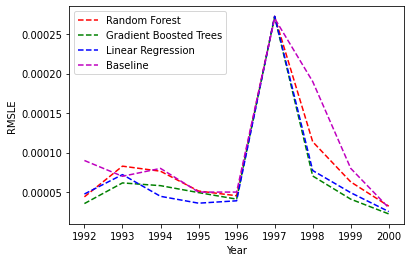

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(results["year"], results["rf_rmsle"], "r--", label = "Random Forest")
plt.plot(results["year"], results["lgbm_rmsle"], "g--", label = "Gradient Boosted Trees")
plt.plot(results["year"], results["linear_rmsle"], "b--", label = "Linear Regression")
plt.plot(results["year"], base_rmsle, "m--", label = "Baseline")
plt.xlabel("Year")
plt.ylabel("RMSLE")
plt.legend()
plt.show()
plt.savefig("results.png")
